In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886010501PNS003SRSPEC0003.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.176e-02 +/- 9.787e-04 (73.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-13
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.69e+04 sec
 Using fit statistic: chi
 Using Background File                P0886010501PNS003BGSPEC0003.FTZ
  Background Exposure Time: 1.69e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886010501PNS003SRCARF0003.FTZ



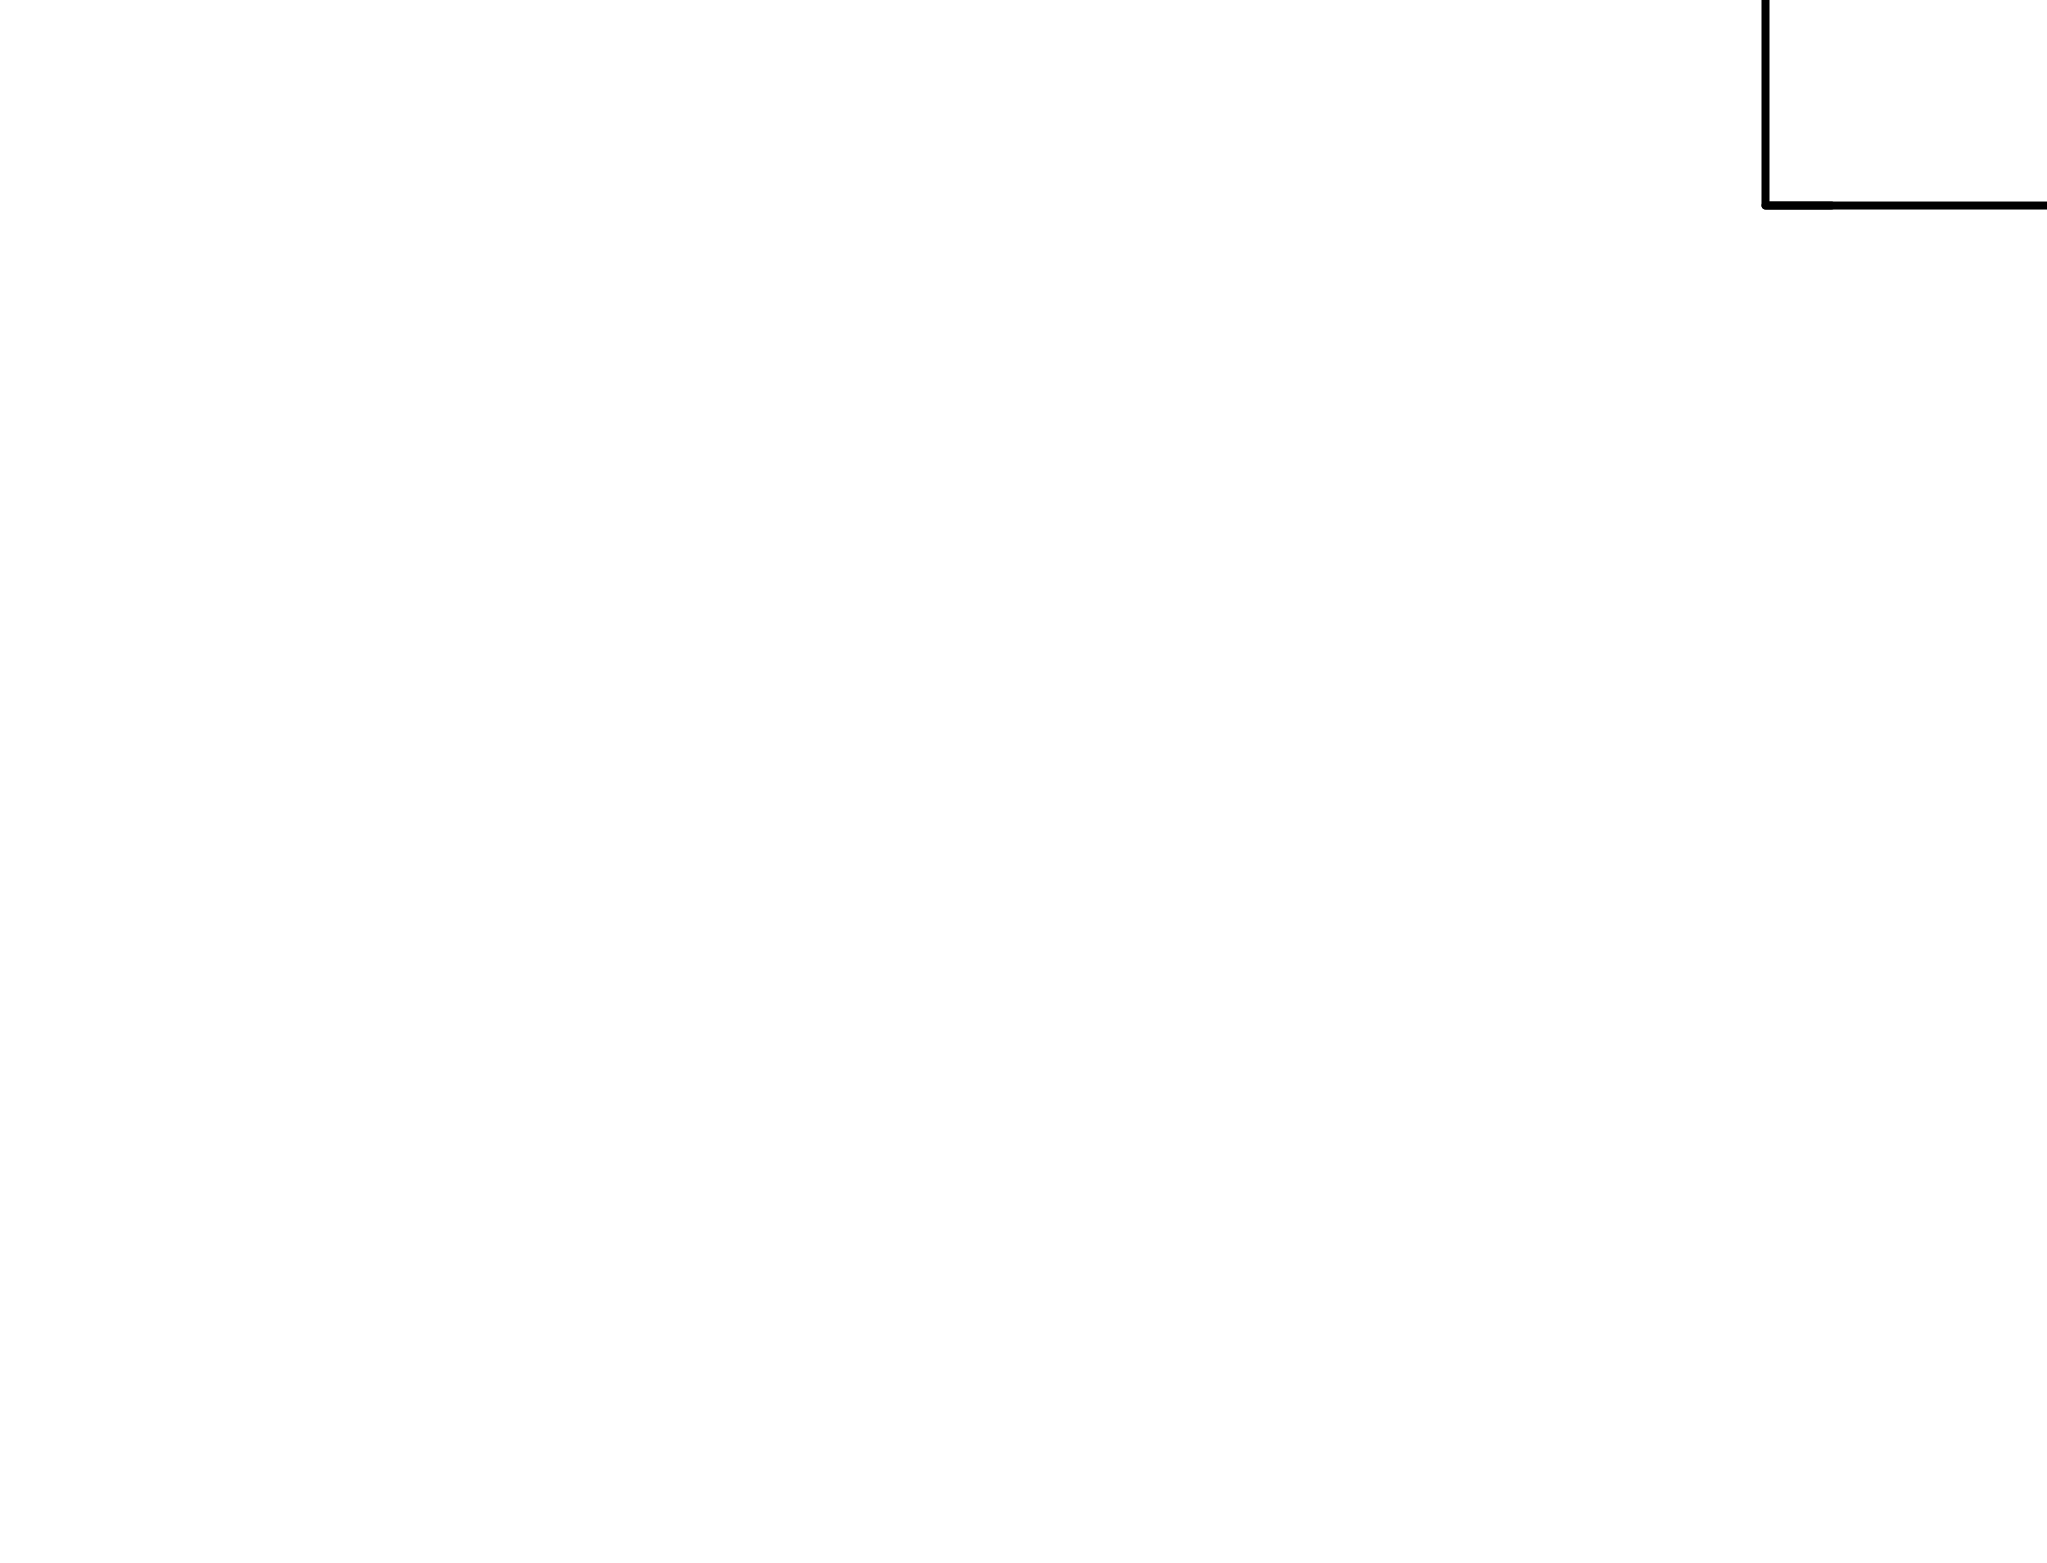

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (13) ignored in spectrum #     1

Fit statistic  : Chi-Squared                 10.2328     using 12 bins.

Test statistic : Chi-Squared                 10.2328     using 12 bins.
 Null hypothesis probability of 1.7576e-01 with 7 degrees of freedom
 Current data and model not fit yet.


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.668636e+12     using 12 bins.

Test statistic : Chi-Squared              2.668636e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current

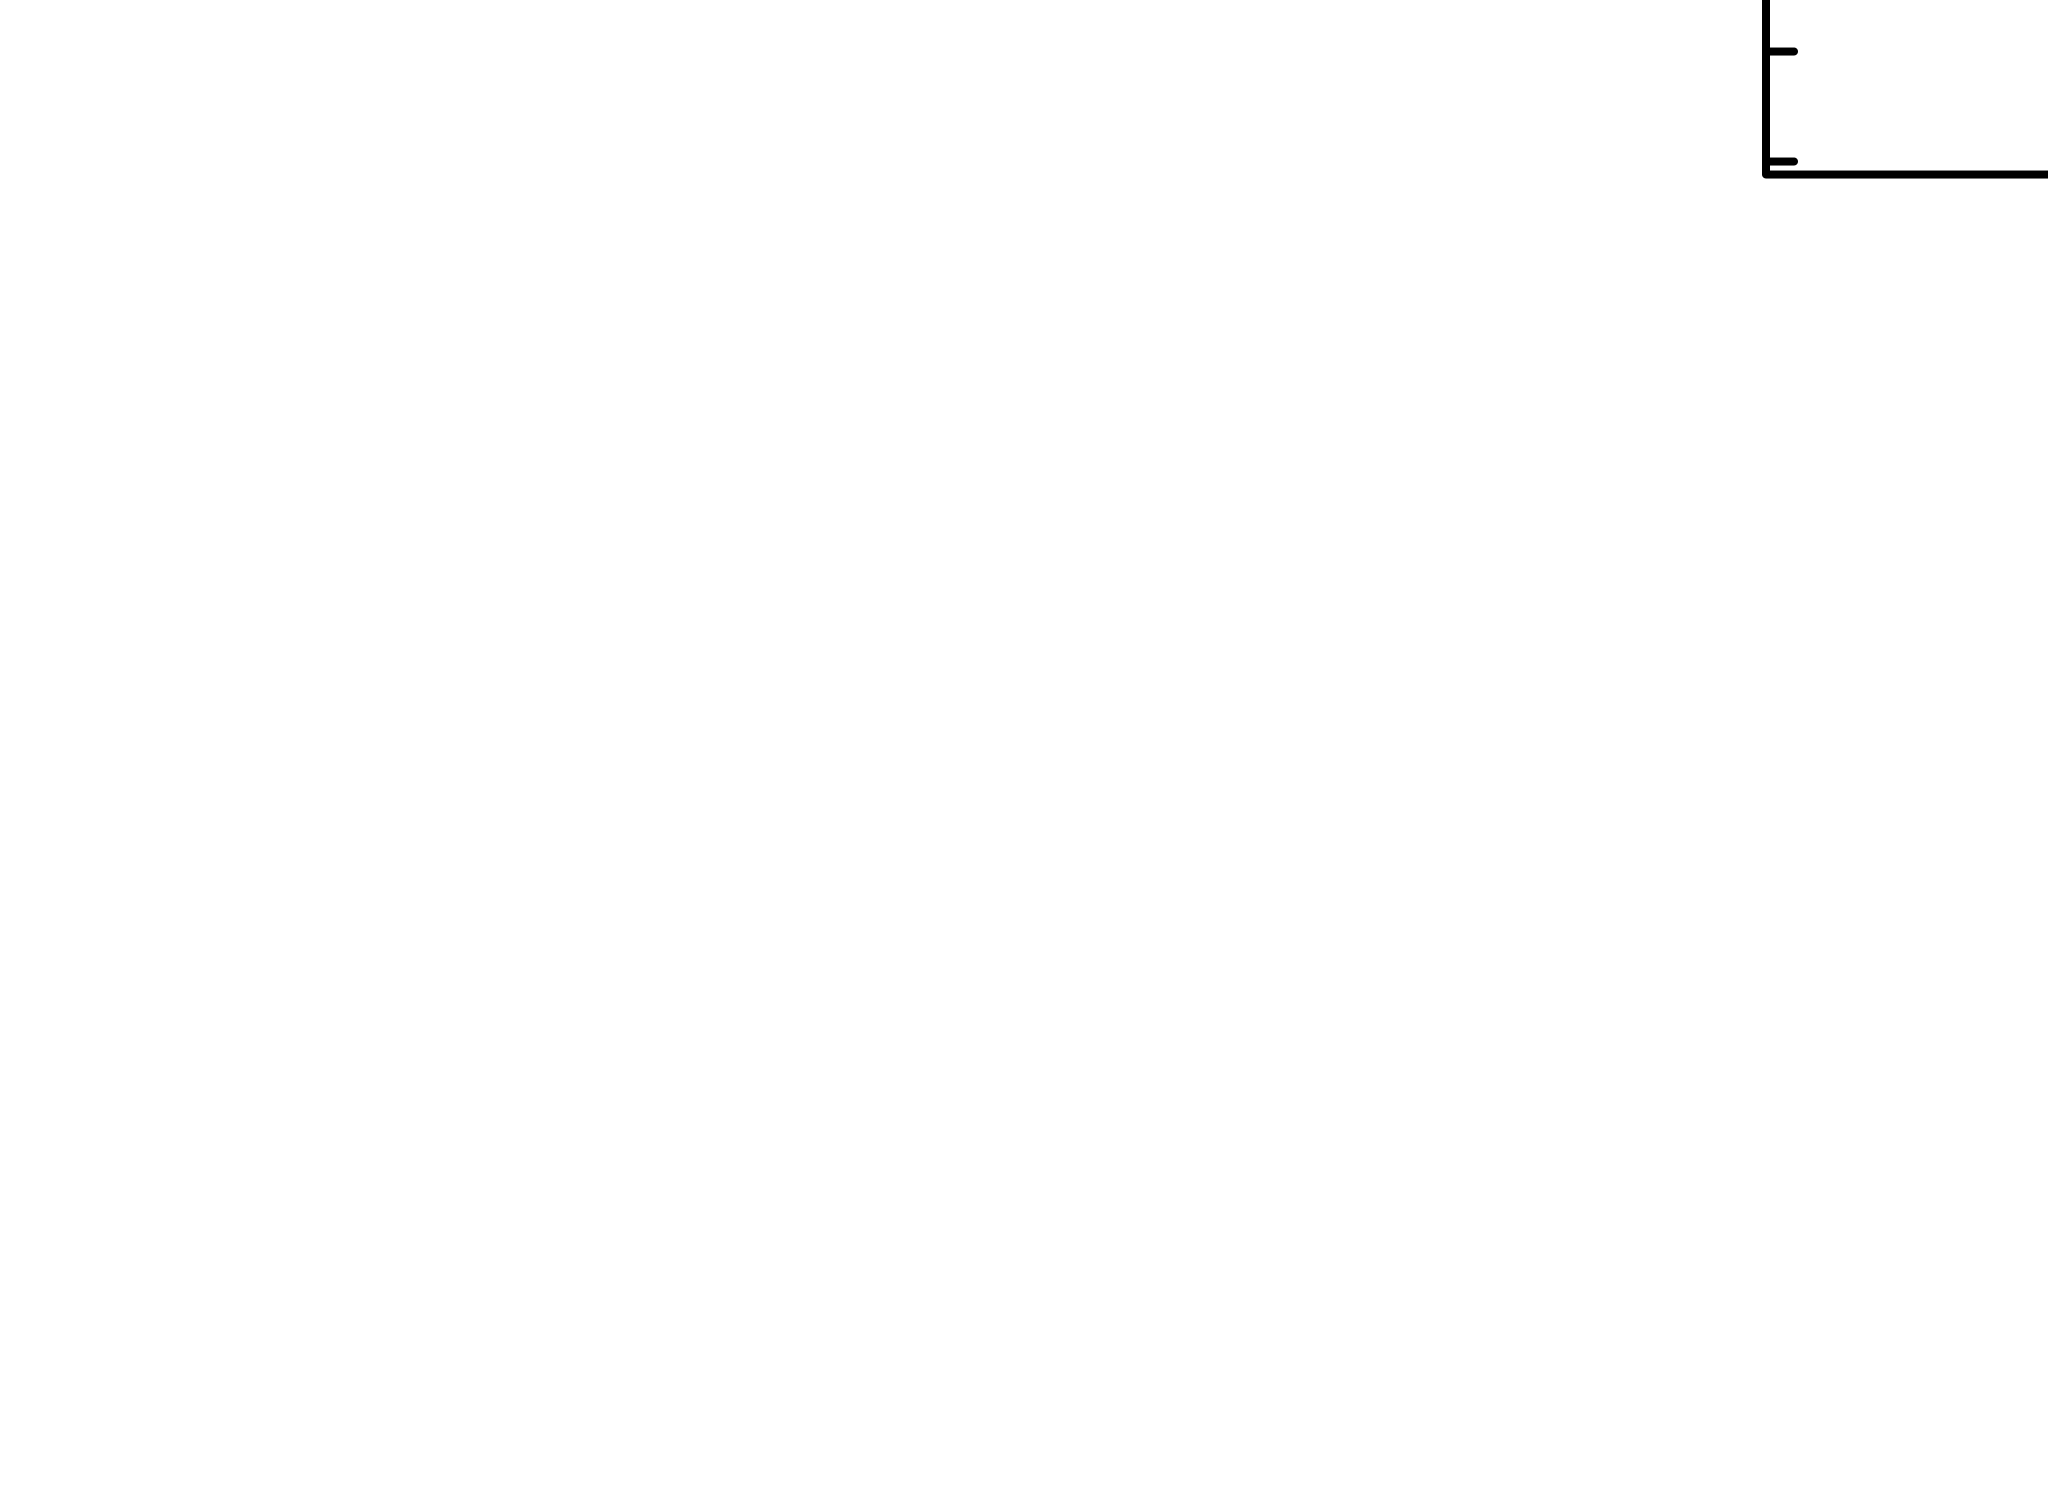

In [18]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [19]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      1.55158      6.98265    (-2.04983,3.38124)
 Parameter   Confidence Range (2.706)
     2       1.9004       6.9391    (-1.07978,3.95892)



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.028015e+12     using 12 bins.

Test statistic : Chi-Squared              1.028015e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
29.5561      12.886       -2       1.31093      -1.29070   4.65730e-07
29.0769      2.28141e+06  -1      0.385323      -1.19721   5.29246e-07
26.8244      1.02641e+06  -1       1.32445      -1.11776   6.30040e-07

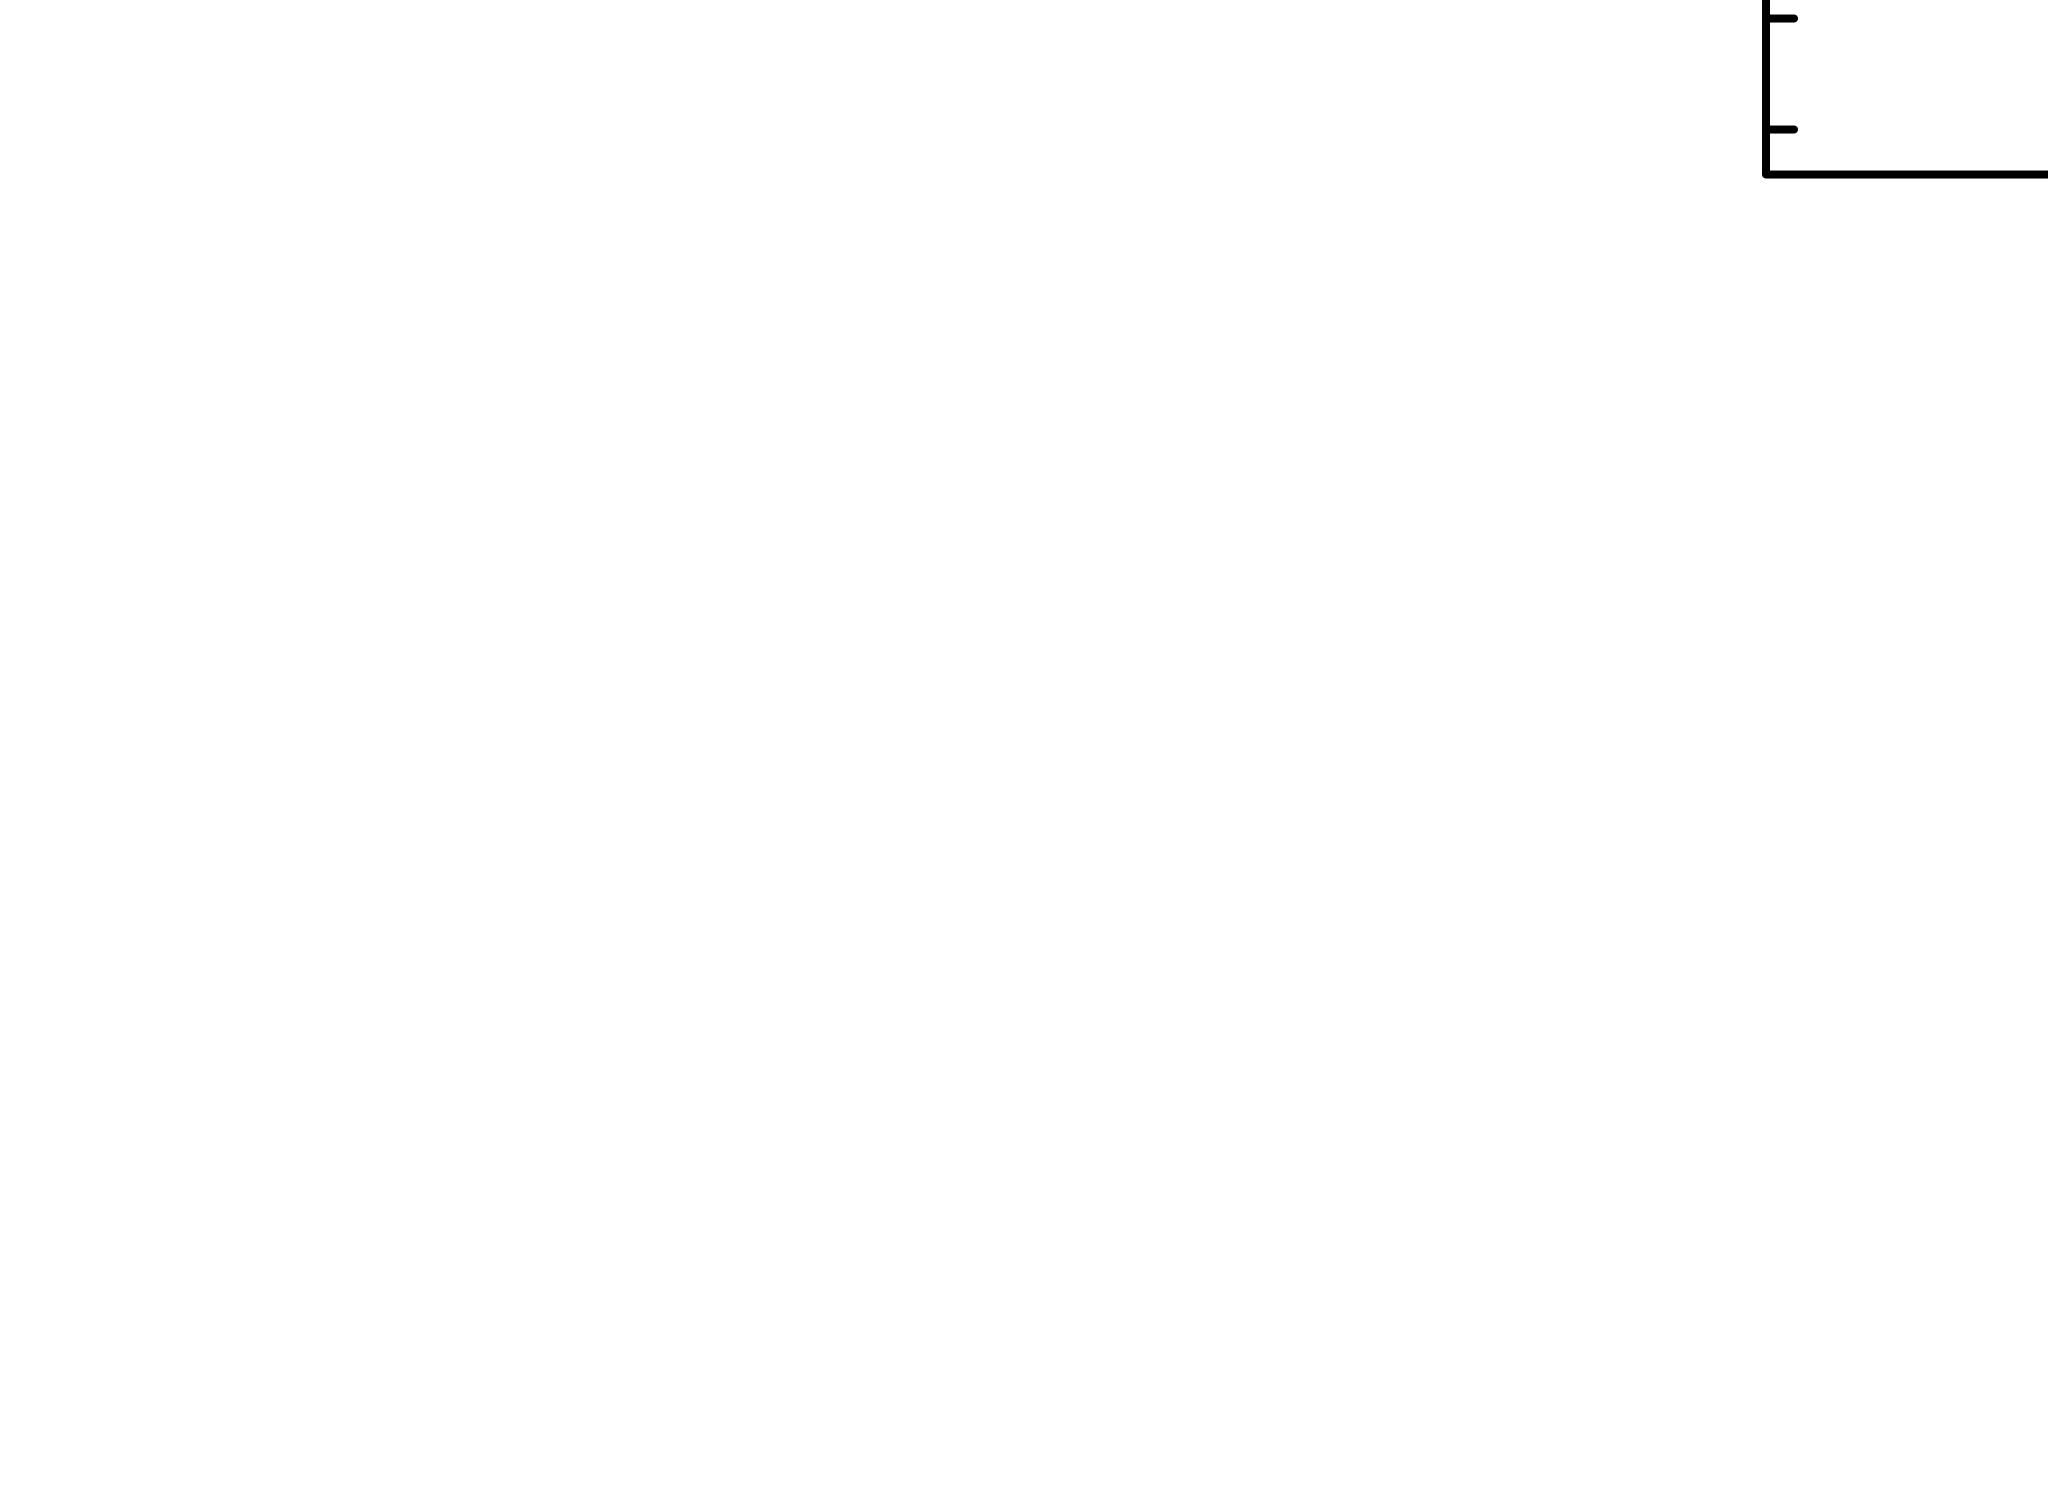

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      2.32876      9.99896    (-3.05202,4.61819)
 Parameter   Confidence Range (2.706)
     2    -0.450352       1.3392    (-0.827567,0.961982)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.453534e+11     using 12 bins.

Test statistic : Chi-Squared              2.453534e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
122.333      4.89455       0       1.48458       48.7187   8.48048e-06
67.7666      515570       -1       7.02381       88.3404   4.05734e-05
22.0054      268127       -2       9.50691       199.179   0.000122531
1

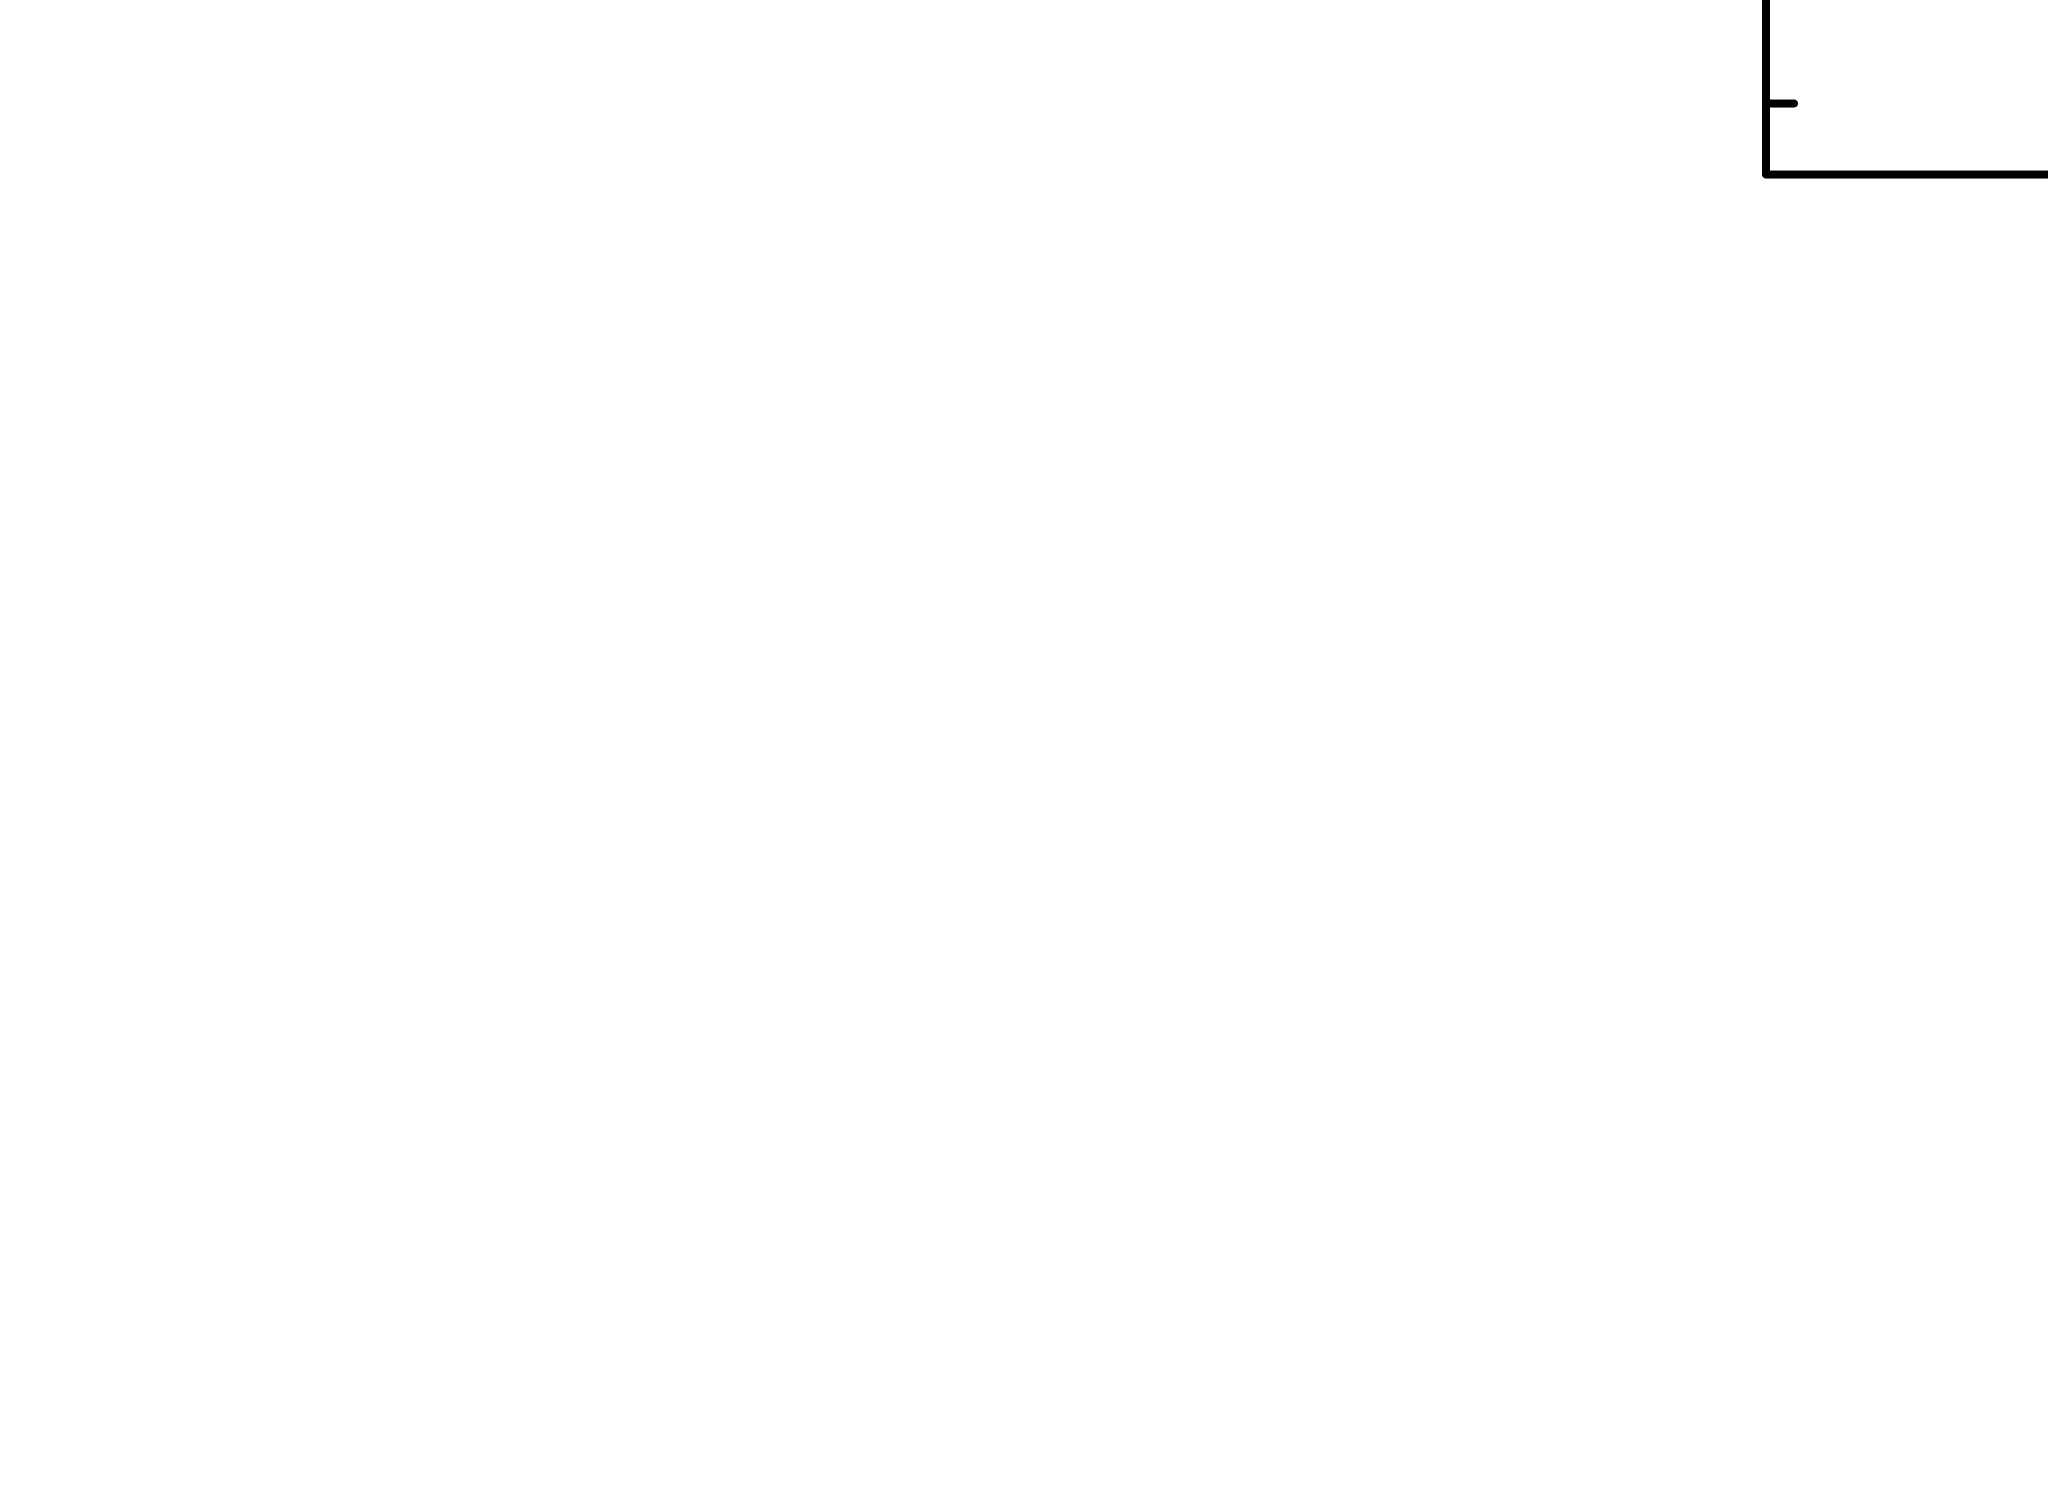

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

Cannot do error calc: Reduced Chi^2 (= 2.14762) > maximum (2)


Exception: Error executing command: error


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.118547e+11     using 12 bins.

Test statistic : Chi-Squared              1.118547e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
155.666      0.0449878    -2      0.352984       50.3518   1

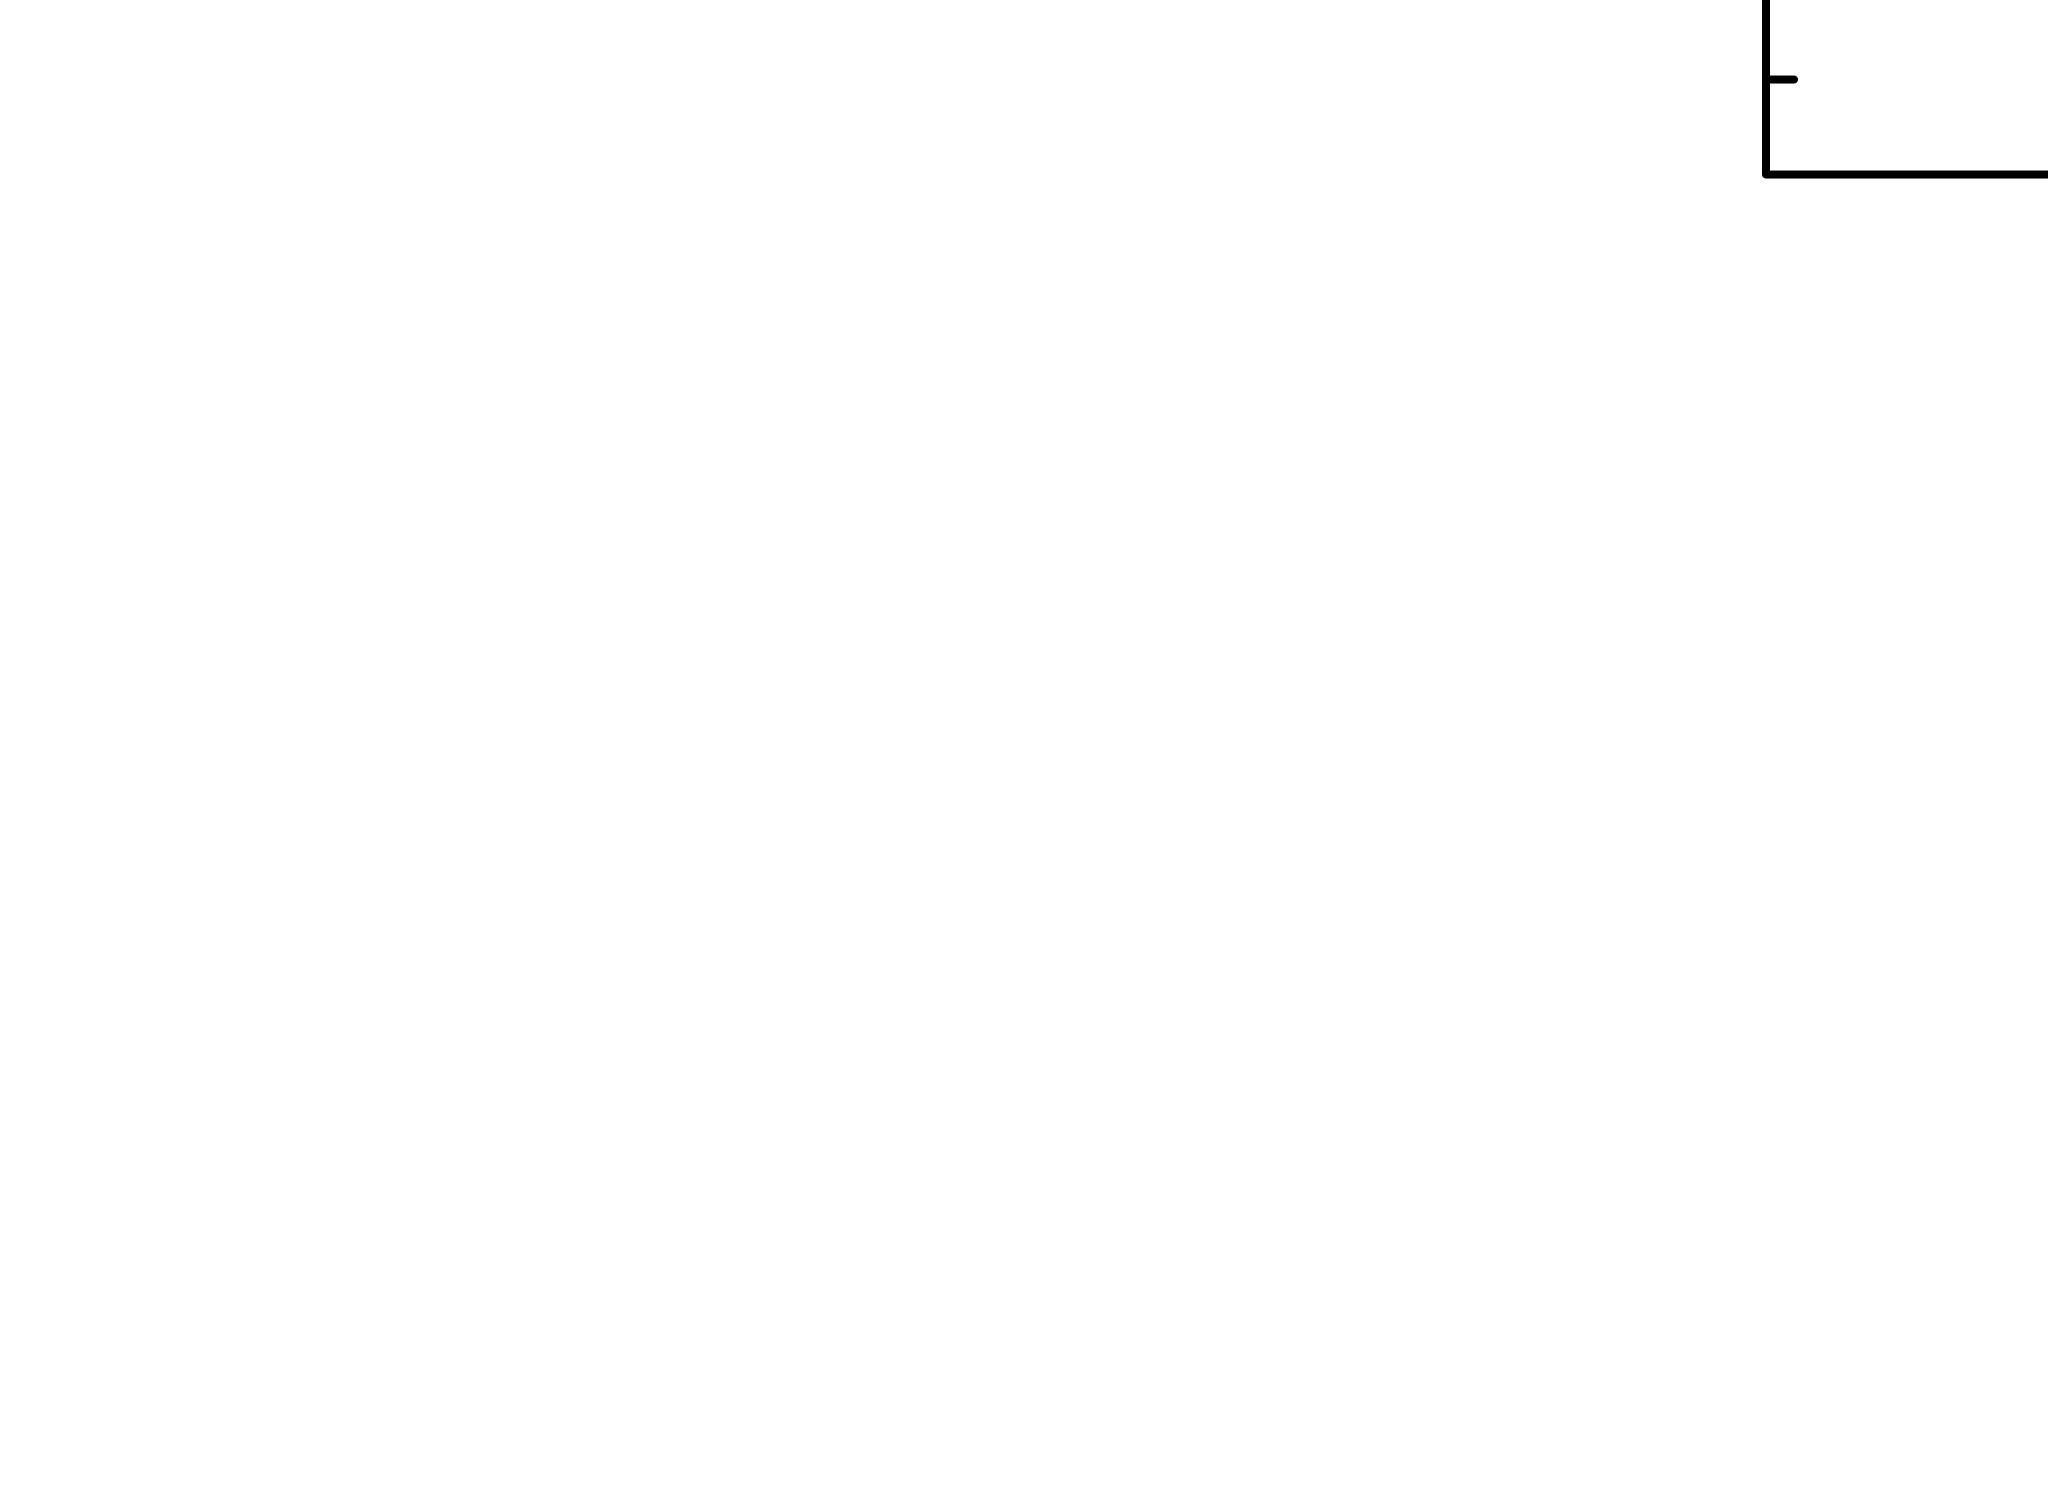

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

Cannot do error calc: Reduced Chi^2 (= 2.09908) > maximum (2)


Exception: Error executing command: error

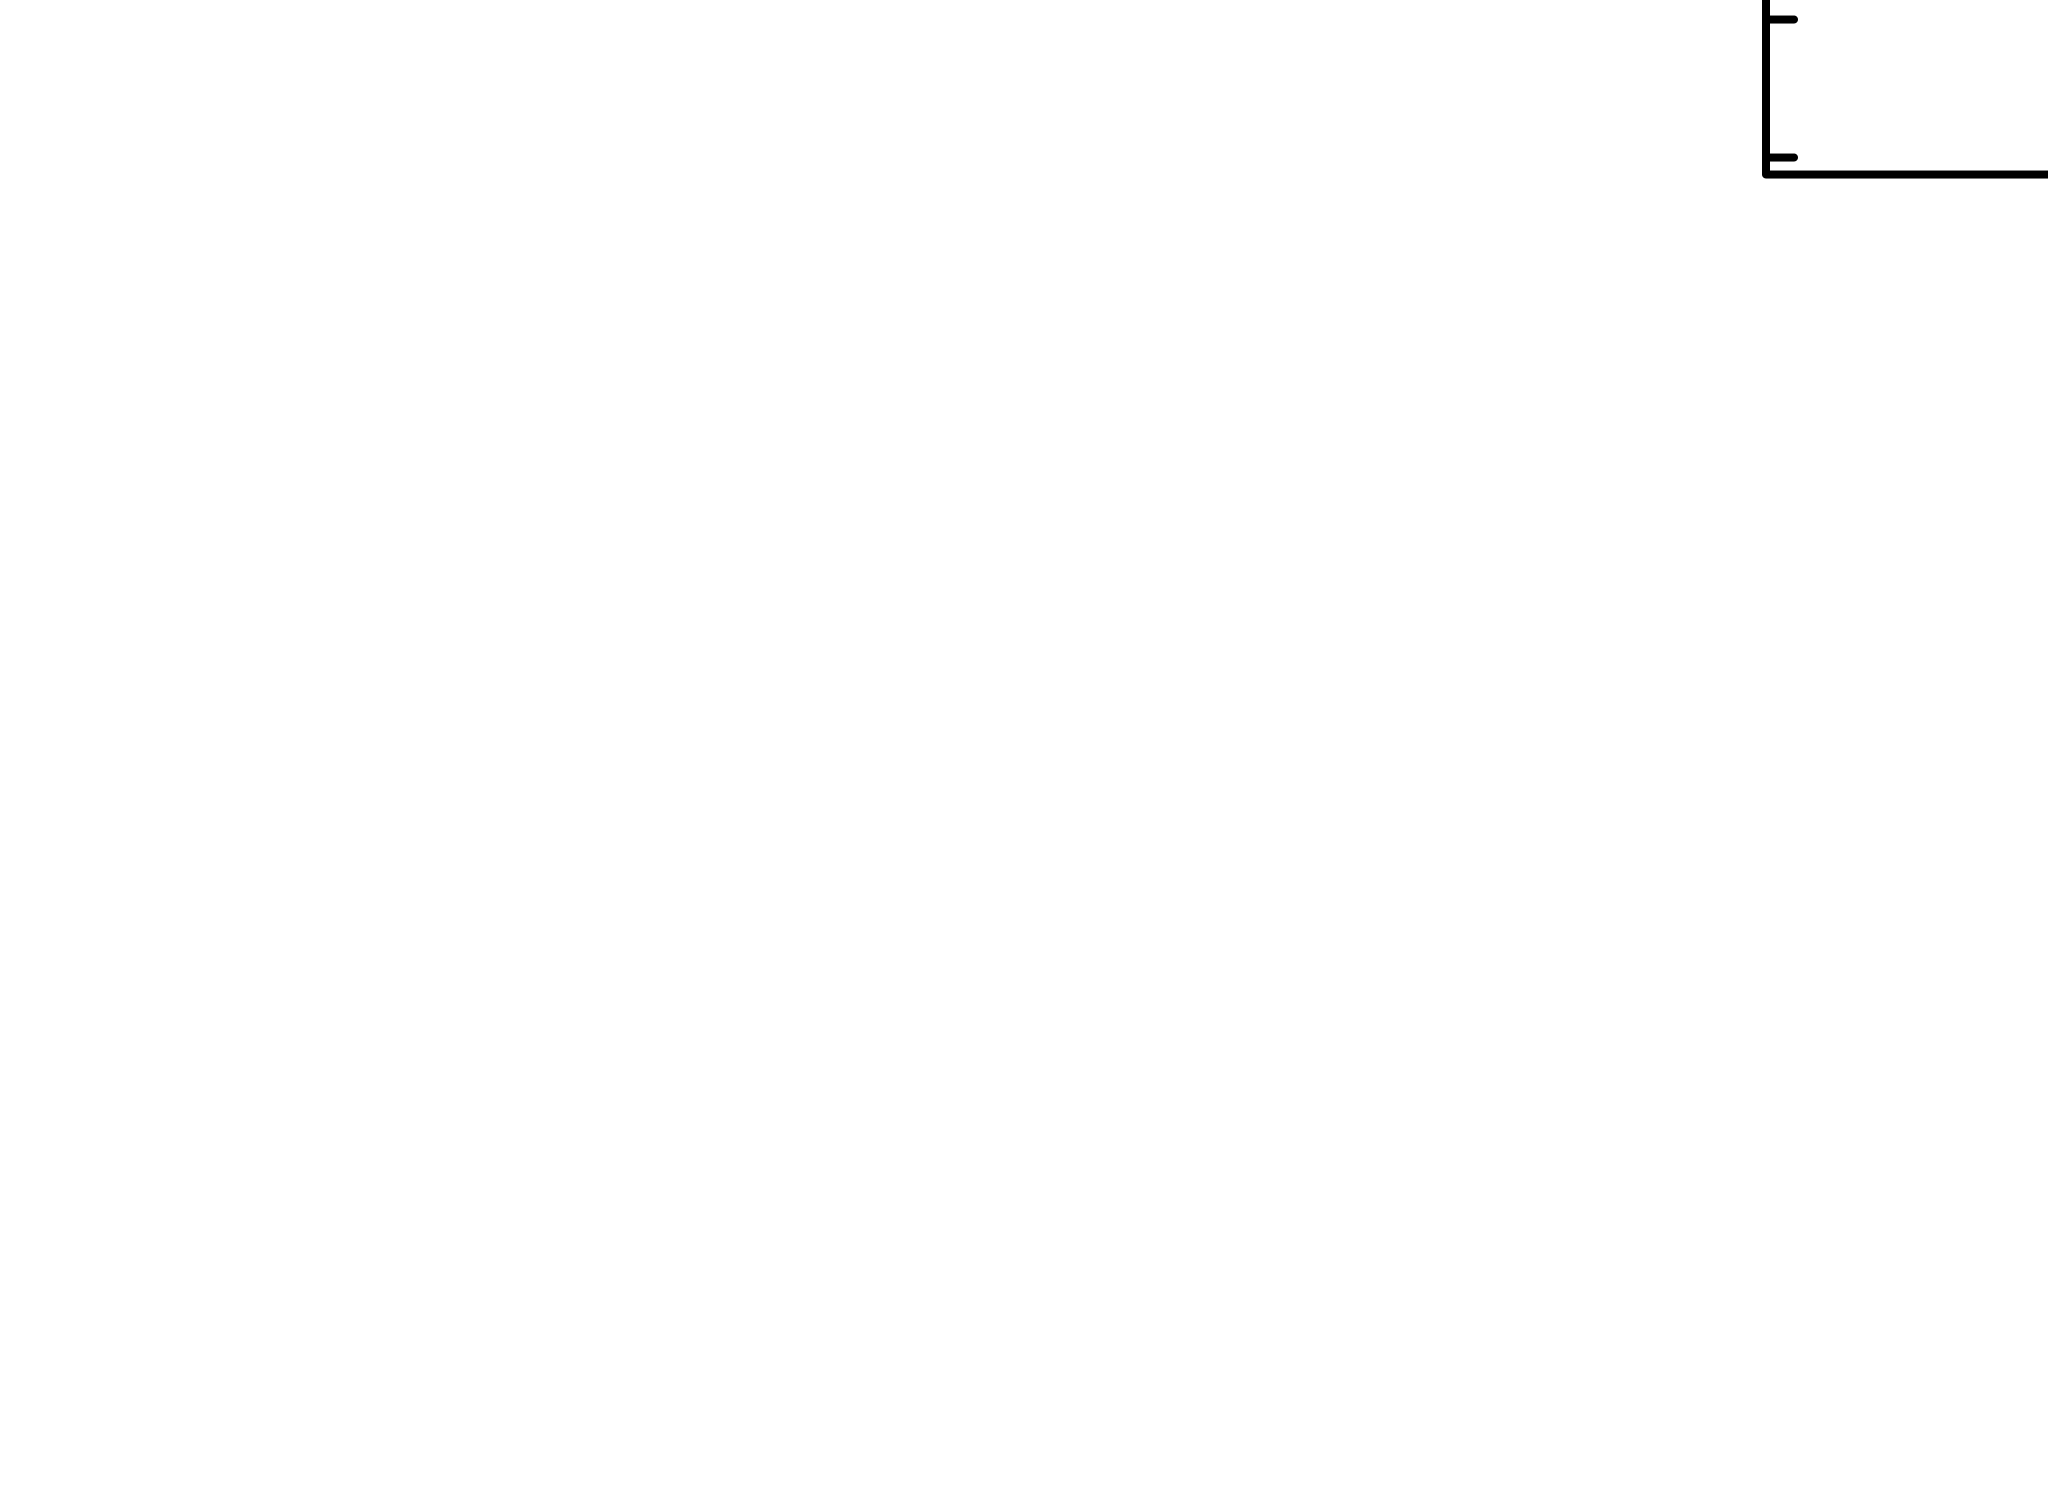


Model TBabs<1>(powerlaw<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.662013e+12     using 12 bins.

Test statistic : Chi-Squared              2.662013e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.547033e+12     using 12 bins.

Test statisti

In [10]:
AllModels.clear()
mo = Model("tbabs*(powerlaw+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.031997e+12     using 12 bins.

Test statistic : Chi-Squared              5.031997e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.922811e+12     using 12 bins.

Test statistic :

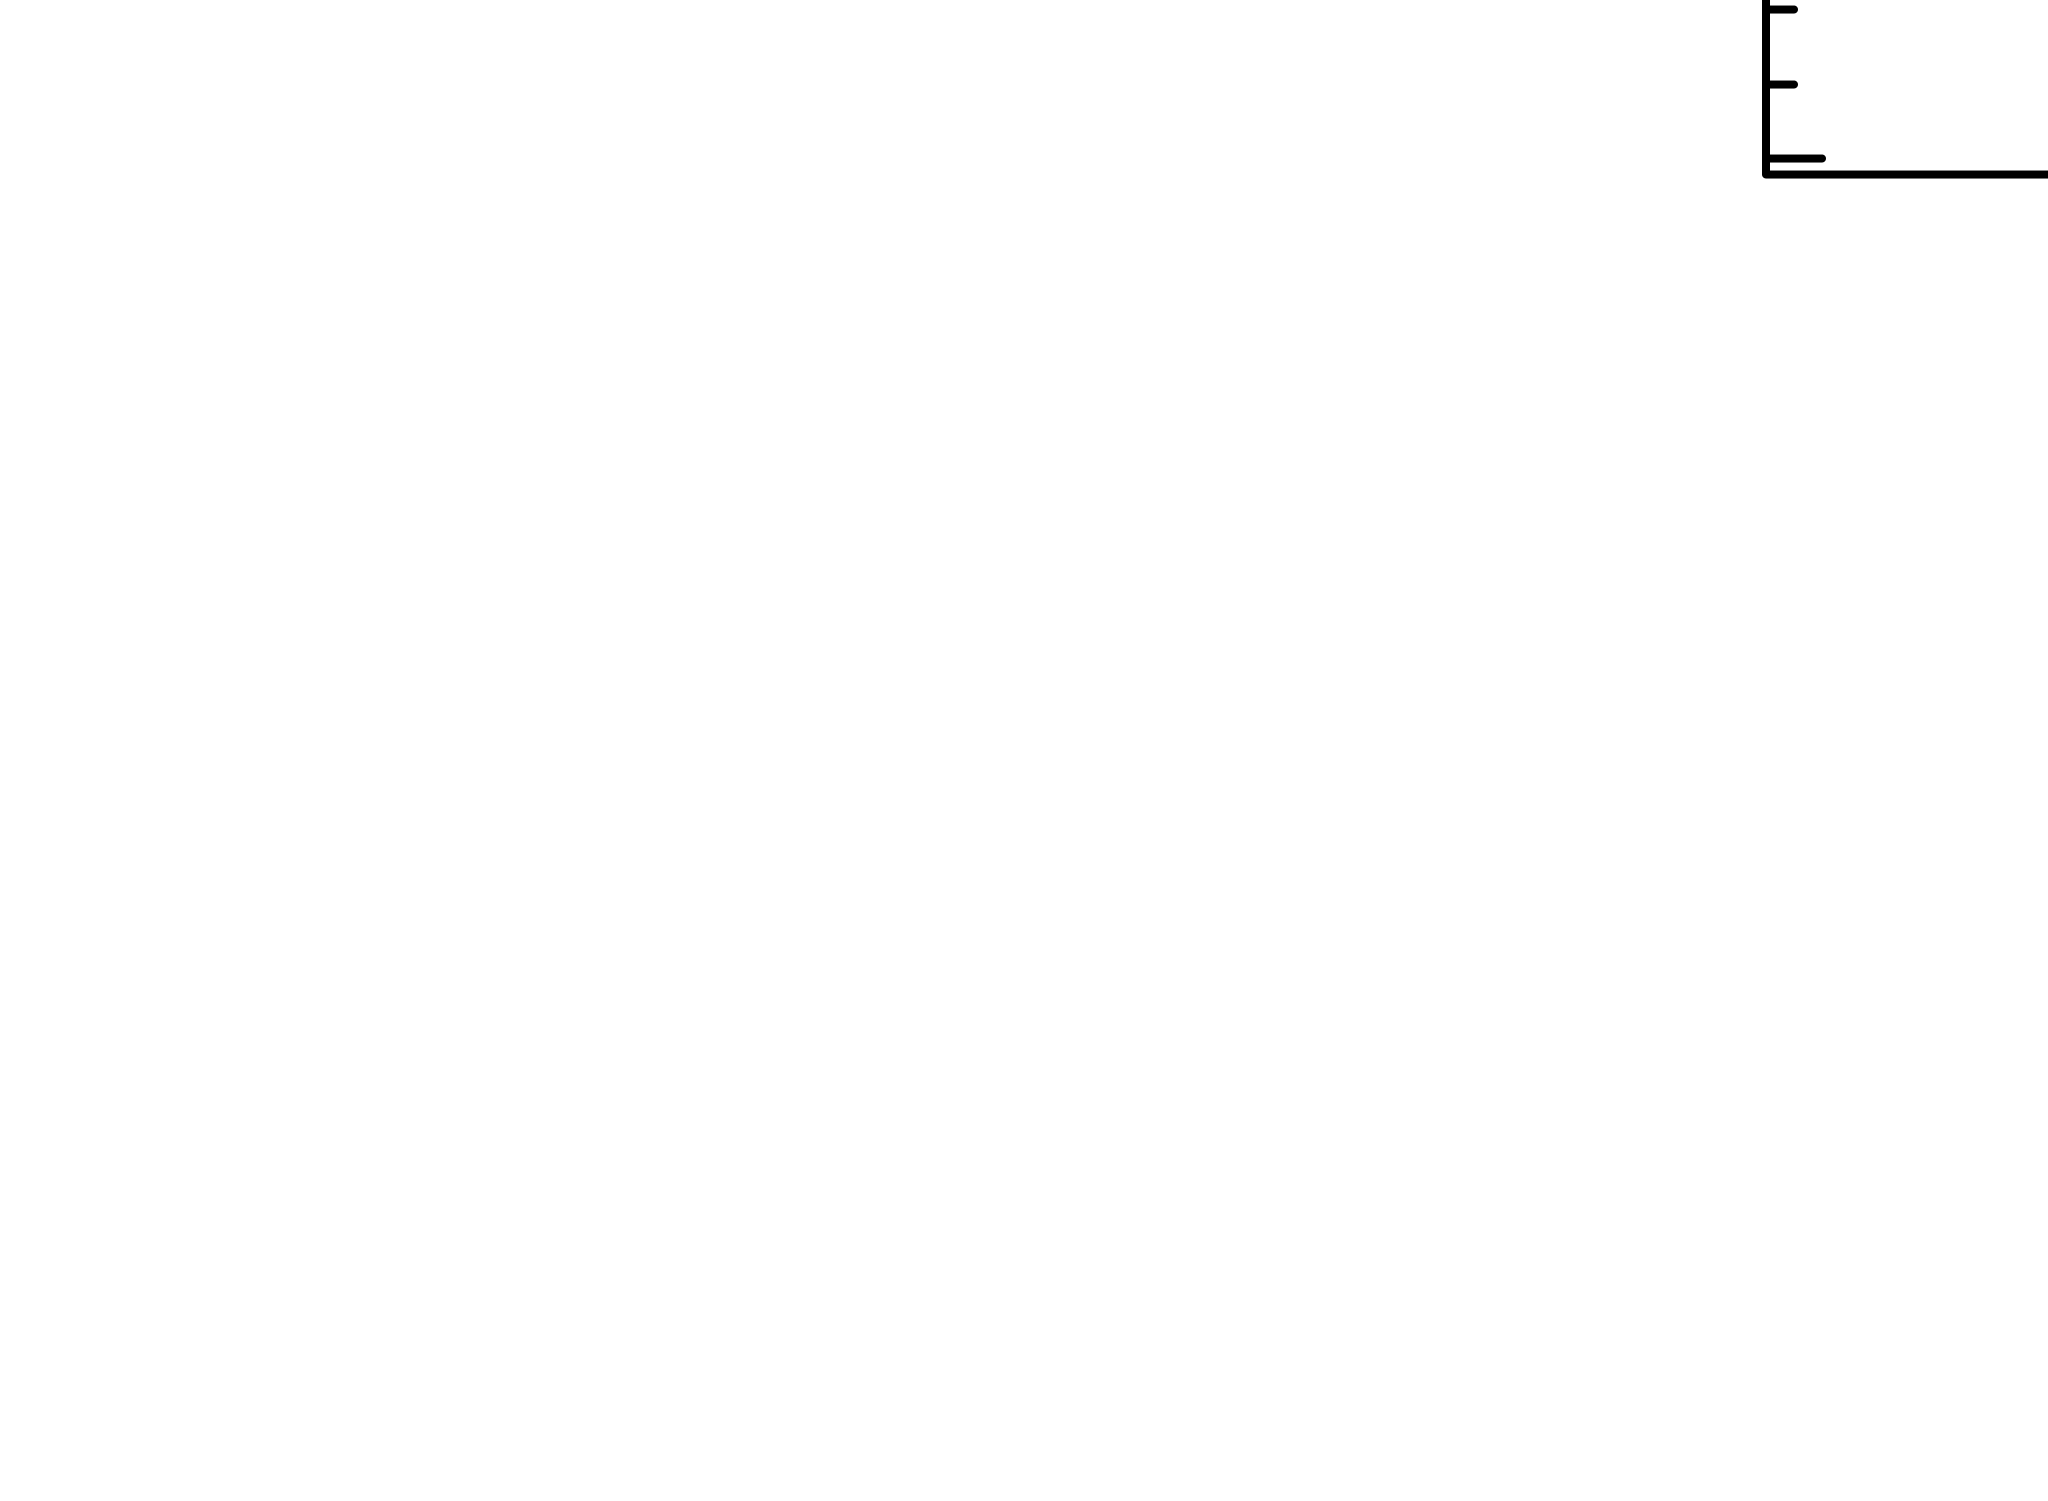

713   9.45450e-05
11.4032      166.126      -2       21.5007      0.305192   0.000284458       5.09153   9.79225e-05
11.3964      147.047      -2       21.6184      0.303635   0.000299129       5.25724   0.000101329
11.3903      131.674      -2       21.7281      0.302211   0.000313448       5.42373   0.000104750
11.3846      116.406      -2       21.8300      0.300901   0.000327367       5.59064   0.000108178
11.3796      104.362      -2       21.9240      0.299711   0.000340720       5.75743   0.000111601
11.3749      92.4568      -2       22.0116      0.298606   0.000353708       5.92408   0.000115021
11.3706      83.7648      -2       22.0934      0.297586   0.000366265       6.09039   0.000118433
11.3668      75.3719      -2       22.1695      0.296645   0.000378342       6.25613   0.000121832
11.3632      68.5812      -2       22.2400      0.295782   0.000389878       6.42109   0.000125213
11.36        61.9935      -2       22.3052      0.294990   0.000400859       6.58506   0.00

In [11]:
AllModels.clear()
mo = Model("tbabs*(bbody+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.6255e-05 photons (5.6375e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
#plx = 1.4843
d_kpc = 8
F_x = 5.6375*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

4.3156678436608e+33


In [14]:
import numpy as np
print(np.log10(L_x))

33.63504801172534


In [15]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  1.0098972558160781



Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.467495e+12     using 12 bins.

Test statistic : Chi-Squared              6.467495e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.064005e+14     using 12 bins.

Test statistic : Chi-Squared              1.064005e+14     using 12 bins.
 Null hypothesis 

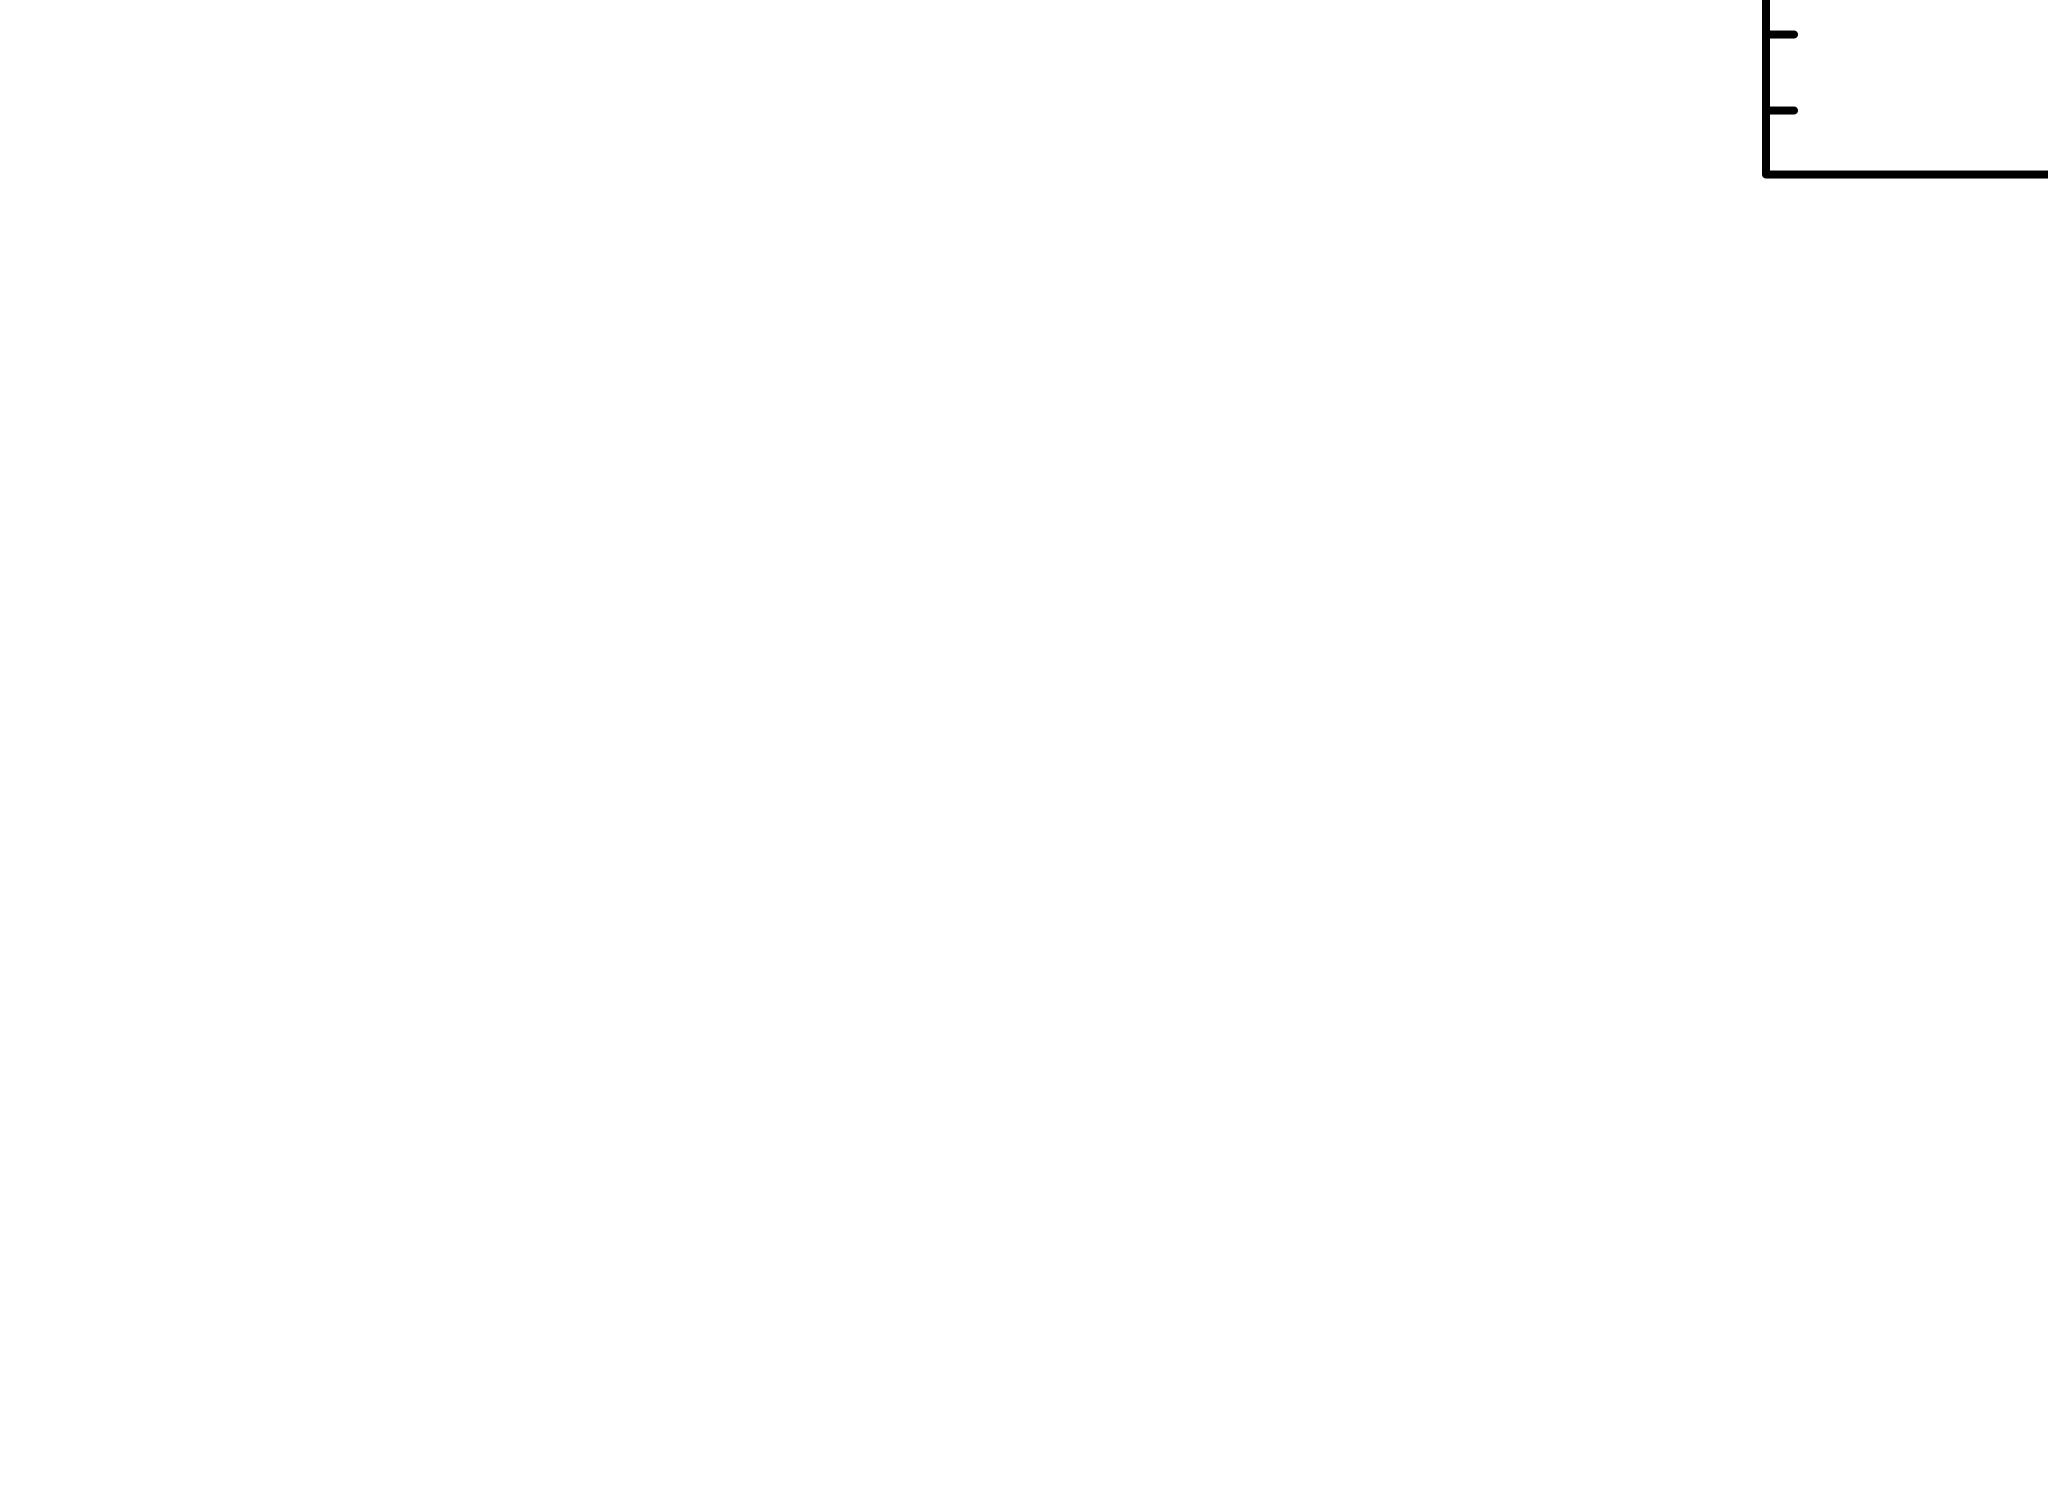

In [16]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.0
Fit.perform()
Plot("data resid")

In [17]:
Fit.error("1")
Fit.error("2")
Fit.error("4")

 Parameter   Confidence Range (2.706)
     1       13.878      53.9032    (-16.8659,23.1593)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 8.5689e-23 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 8.5689e-23 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
     2     0.145828     0.411535    (-0.0736981,0.192009)
 Parameter   Confidence Range (2.706)
     4    -0.636554      3.04653    (-1.70302,1.98007)
